**Завдання 2.5. Вивчити метрики якості класифікації**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

# Завантаження даних
try:
    df = pd.read_csv('data_metrics.csv')
except FileNotFoundError:
    print("Файл 'data_metrics.csv' не знайдено. Будь ласка, завантажте його в Google Colab.")
    # Приклад для програмного завантаження файлу
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv('data_metrics.csv')

# Визначення порогу та додавання стовпців з прогнозованими мітками
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= thresh).astype('int')
df['predicted_LR'] = (df.model_LR >= thresh).astype('int')

**Визначення власних функцій для метрик**

In [ ]:
def feshchenko_find_TP(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 1))

def feshchenko_find_FN(y_true, y_pred):
    return sum((y_true == 1) & (y_pred == 0))

def feshchenko_find_FP(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 1))

def feshchenko_find_TN(y_true, y_pred):
    return sum((y_true == 0) & (y_pred == 0))

def feshchenko_find_conf_matrix_values(y_true, y_pred):
    TP = feshchenko_find_TP(y_true, y_pred)
    FN = feshchenko_find_FN(y_true, y_pred)
    FP = feshchenko_find_FP(y_true, y_pred)
    TN = feshchenko_find_TN(y_true, y_pred)
    return TP, FN, FP, TN

def feshchenko_confusion_matrix(y_true, y_pred):
    TP, FN, FP, TN = feshchenko_find_conf_matrix_values(y_true, y_pred)
    return np.array([[TN, FP], [FN, TP]])

**Власні функції для розрахунку метрик**

In [ ]:
def feshchenko_accuracy_score(y_true, y_pred):
    TP, FN, FP, TN = feshchenko_find_conf_matrix_values(y_true, y_pred)
    return (TP + TN) / len(y_true)

def feshchenko_recall_score(y_true, y_pred):
    TP, FN, FP, TN = feshchenko_find_conf_matrix_values(y_true, y_pred)
    # Запобігання діленню на нуль
    if (TP + FN) == 0:
        return 0
    return TP / (TP + FN)

def feshchenko_precision_score(y_true, y_pred):
    TP, FN, FP, TN = feshchenko_find_conf_matrix_values(y_true, y_pred)
    # Запобігання діленню на нуль
    if (TP + FP) == 0:
        return 0
    return TP / (TP + FP)

def feshchenko_f1_score(y_true, y_pred):
    recall = feshchenko_recall_score(y_true, y_pred)
    precision = feshchenko_precision_score(y_true, y_pred)
    # Запобігання діленню на нуль
    if (precision + recall) == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

**Перевірка та друк метрик для порогу 0.5**

In [ ]:
print('--- Порівняння Accuracy ---')
assert np.isclose(feshchenko_accuracy_score(df.actual_label.values, df.predicted_RF.values), accuracy_score(df.actual_label.values, df.predicted_RF.values)), 'feshchenko_accuracy_score failed on RF'
assert np.isclose(feshchenko_accuracy_score(df.actual_label.values, df.predicted_LR.values), accuracy_score(df.actual_label.values, df.predicted_LR.values)), 'feshchenko_accuracy_score failed on LR'
print('Accuracy RF: %.3f' % feshchenko_accuracy_score(df.actual_label.values, df.predicted_RF.values))
print('Accuracy LR: %.3f' % feshchenko_accuracy_score(df.actual_label.values, df.predicted_LR.values))

print('\n--- Порівняння Recall ---')
assert np.isclose(feshchenko_recall_score(df.actual_label.values, df.predicted_RF.values), recall_score(df.actual_label.values, df.predicted_RF.values)), 'feshchenko_recall_score failed on RF'
assert np.isclose(feshchenko_recall_score(df.actual_label.values, df.predicted_LR.values), recall_score(df.actual_label.values, df.predicted_LR.values)), 'feshchenko_recall_score failed on LR'
print('Recall RF: %.3f' % feshchenko_recall_score(df.actual_label.values, df.predicted_RF.values))
print('Recall LR: %.3f' % feshchenko_recall_score(df.actual_label.values, df.predicted_LR.values))

print('\n--- Порівняння Precision ---')
assert np.isclose(feshchenko_precision_score(df.actual_label.values, df.predicted_RF.values), precision_score(df.actual_label.values, df.predicted_RF.values)), 'feshchenko_precision_score failed on RF'
assert np.isclose(feshchenko_precision_score(df.actual_label.values, df.predicted_LR.values), precision_score(df.actual_label.values, df.predicted_LR.values)), 'feshchenko_precision_score failed on LR'
print('Precision RF: %.3f' % feshchenko_precision_score(df.actual_label.values, df.predicted_RF.values))
print('Precision LR: %.3f' % feshchenko_precision_score(df.actual_label.values, df.predicted_LR.values))

print('\n--- Порівняння F1-Score ---')
assert np.isclose(feshchenko_f1_score(df.actual_label.values, df.predicted_RF.values), f1_score(df.actual_label.values, df.predicted_RF.values)), 'feshchenko_f1_score failed on RF'
assert np.isclose(feshchenko_f1_score(df.actual_label.values, df.predicted_LR.values), f1_score(df.actual_label.values, df.predicted_LR.values)), 'feshchenko_f1_score failed on LR'
print('F1 RF: %.3f' % feshchenko_f1_score(df.actual_label.values, df.predicted_RF.values))
print('F1 LR: %.3f' % feshchenko_f1_score(df.actual_label.values, df.predicted_LR.values))


--- Порівняння Accuracy ---
Accuracy RF: 0.671
Accuracy LR: 0.616

--- Порівняння Recall ---
Recall RF: 0.641
Recall LR: 0.543

--- Порівняння Precision ---
Precision RF: 0.681
Precision LR: 0.636

--- Порівняння F1-Score ---
F1 RF: 0.660
F1 LR: 0.586


**Аналіз впливу порогу**

In [ ]:
print('\nscores with threshold = 0.5')
print('Accuracy RF: %.3f' % feshchenko_accuracy_score(df.actual_label.values, (df.model_RF >= 0.5).astype('int').values))
print('Recall RF: %.3f' % feshchenko_recall_score(df.actual_label.values, (df.model_RF >= 0.5).astype('int').values))
print('Precision RF: %.3f' % feshchenko_precision_score(df.actual_label.values, (df.model_RF >= 0.5).astype('int').values))
print('F1 RF: %.3f' % feshchenko_f1_score(df.actual_label.values, (df.model_RF >= 0.5).astype('int').values))

print('\nscores with threshold = 0.25')
print('Accuracy RF: %.3f' % feshchenko_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))
print('Recall RF: %.3f' % feshchenko_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))
print('Precision RF: %.3f' % feshchenko_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))
print('F1 RF: %.3f' % feshchenko_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values))



scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660

scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


**Побудова ROC-кривої**


--- ROC-криві ---


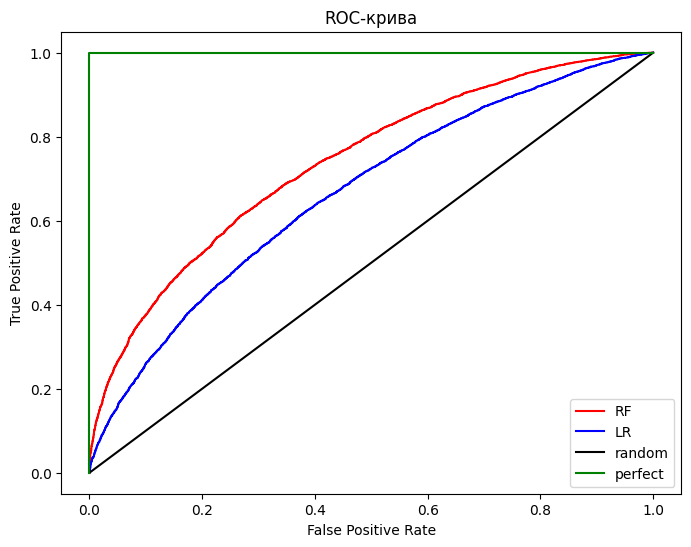

In [ ]:
print('\n--- ROC-криві ---')
fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, 'r-', label='RF')
plt.plot(fpr_LR, tpr_LR, 'b-', label='LR')
plt.plot([0, 1], [0, 1], 'k-', label='random')
plt.plot([0, 0, 1, 1], [0, 1, 1, 1], 'g-', label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.show()


**Обчислення AUC та повторна візуалізація**


--- AUC ---
AUC RF: 0.738
AUC LR: 0.666


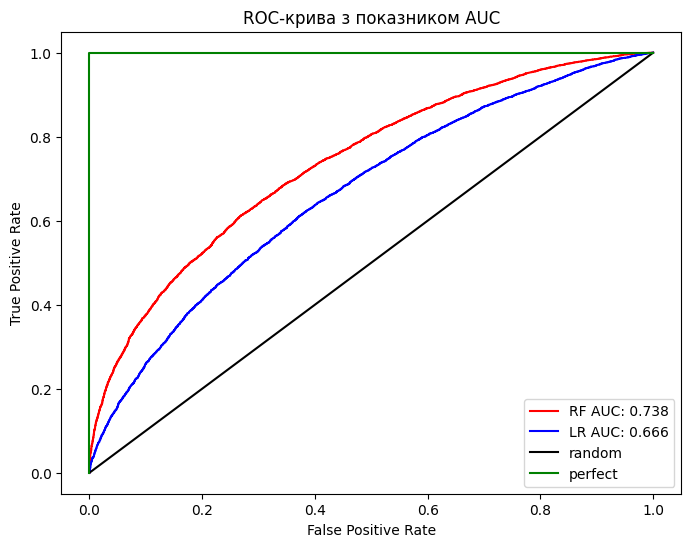

In [ ]:
print('\n--- AUC ---')
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print('AUC RF: %.3f' % auc_RF)
print('AUC LR: %.3f' % auc_LR)

plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, 'r-', label='RF AUC: %.3f' % auc_RF)
plt.plot(fpr_LR, tpr_LR, 'b-', label='LR AUC: %.3f' % auc_LR)
plt.plot([0, 1], [0, 1], 'k-', label='random')
plt.plot([0, 0, 1, 1], [0, 1, 1, 1], 'g-', label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива з показником AUC')
plt.show()
